<a href="https://colab.research.google.com/github/diego-ciciani01/ADM---HW5/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1862339 Gloria Kim** <br>
**1917002 Gabriele Volzone**<br>
**2056861 Begaiym Satarova** <br>
**2140394 Diego Ciciani** <br>

# Es 1.. 2.1

In [ ]:
import networkx as nx
import pandas as pd
import json
import time
import csv
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import ast
from itertools import combinations
from collections import deque

In [ ]:
citation_graph = nx.DiGraph()
collaboration_graph = nx.Graph()


In [ ]:
df_sorted =pd.read_csv('/content/dataset_sorted_top10000.tsv',sep='\t')

In [ ]:
df_sorted.tail()

,id,title,year,authors,n_citation,doc_type,reference_count,references,doi,publisher
9995,1964830323,An overview of JML tools and applications,2005.0,"[{'name': 'Lilian Burdy', 'org': 'INRIA Sophia...",596.0,Conference,82.0,1486696980;1489778371;1492315860;1498946538;14...,https://doi.org/10.1007/s10009-004-0167-4,Springer-Verlag
9996,2101699859,Countering code-injection attacks with instruc...,2003.0,"[{'name': 'Gaurav S. Kc', 'org': 'Columbia Uni...",596.0,Conference,42.0,186343359;1481758559;1499992849;1508969946;151...,https://doi.org/10.1145/948109.948146,ACM
9997,2124609748,Gaussian Process Dynamical Models for Human Mo...,2008.0,"[{'name': 'J.M. Wang', 'org': 'University of T...",596.0,Conference,61.0,1505866674;1546296670;1598702468;1643263348;19...,https://doi.org/10.1109/TPAMI.2007.1167,IEEE Computer Society
9998,2147343704,EVENODD: an efficient scheme for tolerating do...,1995.0,"[{'name': 'M. Blaum', 'org': 'IBM Almaden Rese...",596.0,Journal,9.0,1530042190;1531975040;1820898047;1829547464;20...,https://doi.org/10.1109/12.364531,IEEE Computer Society
9999,2093212899,Simultaneous structure and texture image inpai...,2003.0,"[{'name': 'M. Bertalmio', 'org': 'Dept. de Tec...",596.0,Journal,22.0,1488881187;1565233179;1569587969;1983661653;19...,https://doi.org/10.1109/TIP.2003.815261,IEEE


In [ ]:
def fill_nodes_citation(data, G):
    for _, row in data.iterrows():
        paper_id = row['id']
        references_str = row['references']

        # Convert the references string to a list of integers
        references = [int(ref) for ref in str(references_str).split(';') if ref.isdigit()]

        # Add edges to the graph if the reference exists in the dataset
        for ref in references:
            if ref in data['id'].values:
                G.add_edge(paper_id, ref)


In [ ]:
fill_nodes_citation(df_sorted, citation_graph)

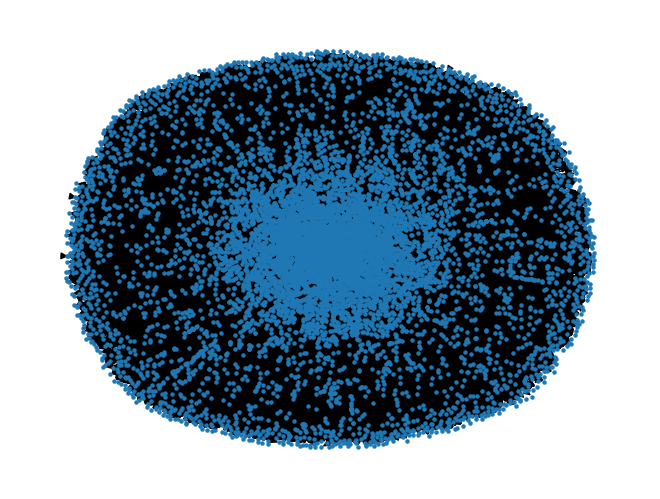

In [ ]:
# draw the graph
pos = nx.spring_layout(citation_graph)
nx.draw(citation_graph, pos, with_labels=False, node_size=5)
plt.show()

In [ ]:
# Find all strongly connected components in the directed graph
strongly_connected_components = list(nx.strongly_connected_components(citation_graph))

# Find the component with the maximum number of nodes
largest_component = max(strongly_connected_components, key=len)

# Extract the corresponding subgraph
subgraph_largest_component = citation_graph.subgraph(largest_component)


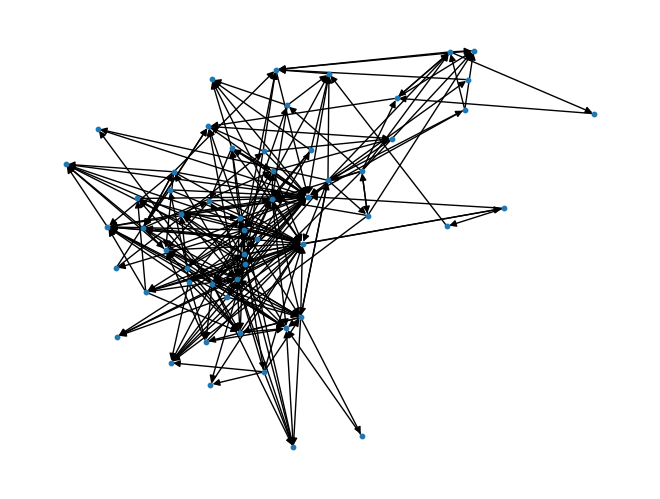

In [ ]:
#print the subgraph got
pos = nx.spring_layout(sotto_grafo_componenti_conn)
nx.draw(sotto_grafo_componenti_conn, pos, with_labels=False, node_size=10)
plt.show()

In [ ]:
def fill_nodes_collaboration(data, G):
    for _, row in data.iterrows():
        authors_str = row['authors']
        title = row['id']

        try:
            authors = ast.literal_eval(authors_str)
            # Extract a unique identifier for each author (e.g., name or ID)
            author_ids = [author.get('name') or author.get('id') for author in authors]
        except ValueError:
            author_ids = []

        author_pairs = list(combinations(author_ids, 2))

        for author_pair in author_pairs:
            if G.has_edge(*author_pair):
                G[author_pair[0]][author_pair[1]]['weight'] = G[author_pair[0]][author_pair[1]]['weight'] + 1 if 'weight' in G[author_pair[0]][author_pair[1]] else 1
            else:
                G.add_edge(author_pair[0], author_pair[1], weight=1, titles=title)


In [ ]:
fill_nodes_collaboration(df_sorted, collaboration_graph)

In [ ]:
# Find all connected components in the undirected graph
connected_components = list(nx.connected_components(collaboration_graph))

# Find the component with the maximum number of nodes
largest_component = max(connected_components, key=len)

# Extract the corresponding subgraph
subgraph_largest_component_collaboration_graph = collaboration_graph.subgraph(largest_component)


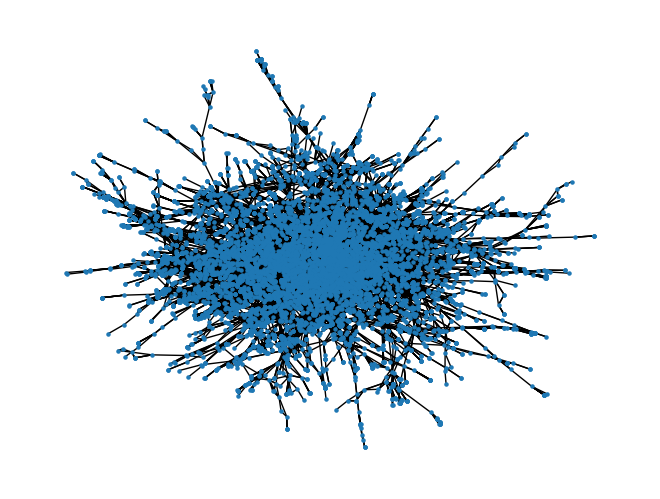

In [ ]:
pos = nx.spring_layout(subgraph_largest_component_collaboration_graph)
nx.draw(subgraph_largest_component_collaboration_graph, pos, with_labels=False, node_size=5)
plt.show()

# 2.1

### Functionality 1 - Graph's features
This function should examine a graph and report on some of its features. The input and report that this function should produce are shown below.

Input:
- The graph
- The name of the graph

Output:
- The number of the nodes in the graph
- The number of the edges in the graph
- The graph density
- The graph degree distribution
- The average degree of the graph
- The graph hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
- Whether the graph is dense or sparse

-----------------------------------------------------------

In [ ]:
def functionality_1(graph, graph_name):
    if graph_name != "citation_graph" and graph_name != "collaboration_graph":
        raise ValueError("Choose 'citation_graph' or 'collaboration_graph' as the second input value")

    # Number of nodes
    num_nodes = graph.number_of_nodes()

    # Number of edges
    num_edges = graph.number_of_edges()

    # Graph density
    density = nx.density(graph)

    # Degree distribution
    degree_sequence = [d for n, d in graph.degree()]
    degree_distribution = dict(zip(*np.unique(degree_sequence, return_counts=True)))

    # Average degree
    avg_degree = np.mean(degree_sequence)

    # 95th percentile of the degree distribution
    percentile_95 = np.percentile(degree_sequence, 95)

    # Graph hubs (nodes with degrees > 95th percentile)
    hubs = [node for node, degree in graph.degree() if degree > percentile_95]

    # Whether the graph is dense or sparse
    graph_type = "dense" if density >= 0.5 else "sparse"

    return num_nodes, num_edges, density, degree_distribution, avg_degree, hubs, graph_type


### Functionality 2 - Nodes' contribution
Using this functionality, you will identify the papers/authors who have significantly contributed to this field of study. For this analysis, focusing solely on the number of citations for the paper or the number of collaborations of the authors can be misleading. You will examine this using various centrality measurements.

Input:
- The graph
- A node of the graph (paper/author)
- The name of the graph

Output:
- The centrality of the node, calculated based on the following centrality measurements:
   - Betweeness
   - PageRank
   - ClosenessCentrality
   - DegreeCentrality

------------------------------------------------------------------------------

In [ ]:
def functionality_2(graph, node, graph_name):

    if graph_name != "citation_graph" and graph_name != "collaboration_graph":
        raise ValueError("Choose 'citation_graph' or 'collaboration_graph' as the second input value")

    if node not in graph.nodes:
        raise ValueError(f"node '{node}' not found in the graph.")


    centrality_measures = {}

    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(graph)
    centrality_measures['Betweenness'] = betweenness_centrality.get(node, 0)

    # PageRank
    pagerank_centrality = nx.pagerank(graph)
    centrality_measures['PageRank'] = pagerank_centrality.get(node, 0)

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(graph)
    centrality_measures['ClosenessCentrality'] = closeness_centrality.get(node, 0)

    # Degree Centrality
    degree_centrality = nx.degree_centrality(graph)
    centrality_measures['DegreeCentrality'] = degree_centrality.get(node, 0)

    """"""""""
    print(f"Centrality Measures for {node} in {graph_name}:")
    for measure, value in centrality_measures.items():
        print(f"{measure}: {value}")
    """""""""""

    return centrality_measures


### Functionality 3 - Shortest ordered walk  

Input:  
- The graph data
- A sequence of authors\_a = [a\_2, ..., a\_{n-1}]
- Initial node a\_1 and an end node a\_n
- $N$: denoting the top $N$ authors whose data should be considered

Output:
- The shortest walk of collaborations you need to read to get from author a\_1 to author a\_n and the papers you need to cross to realize this walk.

---------------------------------------------------------------------

This helper function is useful in functionality 3 and 4 in order to get the top N authors based on papers published

In [ ]:
for author in collaboration_graph.nodes:
    collaboration_graph.nodes[author]['papers_published'] = len(list(collaboration_graph.neighbors(author)))
def get_top_nodes(graph, N):
        return sorted(graph.nodes, key=lambda x: graph.nodes[x]['papers_published'], reverse=True)[:N]

The function uses a Breadth-First Search (BFS) approach to explore the graph and find the shortest path between two nodes.
It then performs BFS to find the shortest path and associated titles from the starting node to the first intermediate node.
Subsequently, it iterates through the intermediate nodes, calculating the shortest path and titles for each pair.
Finally, it computes the shortest path and titles from the last intermediate node to the destination node, appending the results to the combined_path dictionary.
If any segment of the path is not found, the function returns a corresponding error message.
The final result is a dictionary containing the combined path and associated titles.


In [ ]:
def functionality_3(graph, start, end, intermediate_nodes, N):
    combined_path = {'path': [], 'titles': []}

    # Helper function to perform BFS
    def BFS(graph, start, end, top_nodes):
        path_queue = deque()

        # Each element in the queue is a tuple (current_path, titles_list)
        temp_path = ([start], [])
        path_queue.append(temp_path)

        while path_queue:
            # Dequeue the next path and its associated titles
            current_path, current_titles = path_queue.popleft()
            last_node = current_path[-1]

            # Check if the last node in the path is the target
            if last_node == end:
                return current_path, current_titles

            # Explore neighbors of the last node
            for link_node, edge_data in graph[last_node].items():
                # Check if the neighbor is not already in the current path and is in the top N nodes
                if link_node not in current_path and link_node in top_nodes:
                    # Extend the path and titles with the new neighbor and its associated titles
                    new_path = current_path + [link_node]
                    new_titles = current_titles + [edge_data.get('titles', [])]
                    path_queue.append((new_path, new_titles))

        # If no valid path is found
        return [], []


    # Get the top N nodes based on papers published
    top_nodes = get_top_nodes(graph, N)

    # Calculate the first path and titles
    first_path, first_titles = BFS(graph, start, intermediate_nodes[0], top_nodes)
    combined_path['path'] += first_path
    combined_path['titles'] += first_titles

    if not first_path:
        return "There is no such path."

    start = intermediate_nodes[0]

    # Iterate through intermediate nodes and calculate the shortest path for each pair
    for intermediate_node in intermediate_nodes[1:]:
        path, titles = BFS(graph, start, intermediate_node, top_nodes)
        combined_path['path'] += path[1:]
        combined_path['titles'] += titles

        if not path:
            return "There is no such path."

        start = intermediate_node

    # Calculate the shortest path from the last intermediate node to the end
    last_path, last_titles = BFS(graph, intermediate_nodes[-1], end, top_nodes)
    combined_path['path'] += last_path[1:]
    combined_path['titles'] += last_titles

    if not last_path:
        return "There is no such path."

    return combined_path


### Functionality 4 - Disconnecting Graphs

Input:
- The graph data
- authorA: a paper to which will relate sub-graph G\_a
- authorB: a paper to which will relate sub-graph G\_b
- $N$: denoting the top $N$ authors that their data should be considered

Output:
- The minimum number of edges (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G\_a and G\_b.

---------------------------------------------------------------------------------------

The Ford-Fulkerson algorithm is used to find the maximum flow in a flow network. To disconnect graphs, one can modify this algorithm by identifying and removing edges with the maximum flow. This process is repeated until the remaining graph becomes disconnected

Directed graphs provide a clear flow direction for the Ford-Fulkerson algorithm, essential for determining and augmenting flow paths. Undirected graphs lack this directional information, hindering the algorithm's ability to establish consistent flow directions and compute maximum flows effectively.

This function converts an undirected graph into a directed graph.
It ensures consistent flow directions for the Ford-Fulkerson algorithm.


In [ ]:

def convert_to_directed(original_graph):
    # Create a new directed graph
    directed_graph = nx.DiGraph()

    # Iterate over the edges of the original graph
    for source, target, edge_data in original_graph.edges(data=True):
        edge_weight = edge_data.get('weight')
        # Create directed edges in both directions
        directed_graph.add_edge(source, target, weight=edge_weight)
        directed_graph.add_edge(target, source, weight=edge_weight)

    return directed_graph



This function performs a Breadth-First Search (BFS) to find augmenting paths.
It updates the parents dictionary to keep track of the path from start to end.


In [ ]:

def BFS(graph, parents, start, end):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        current_node = queue.popleft()

        # Check if the current node is the end
        if current_node == end:
            break

        # Explore neighbors for potential paths
        for neighbor in graph.neighbors(current_node):
            # Check if the edge has remaining capacity and has not been visited yet
            if neighbor not in visited and graph[current_node][neighbor].get('weight') > 0:
                queue.append(neighbor)
                visited.add(neighbor)
                parents[neighbor] = current_node


This function implements the modified version of the Ford-Fulkerson algorithm to find the maximum flow in a graph in order to find the minimum cut.
It modifies the graph by iteratively identifying augmenting paths and updating residual capacities.


In [ ]:

def ford_fulkerson(graph, start, end):
    # Create the residual graph, ensuring it is directed
    residual_graph = convert_to_directed(graph.copy())

    # Initialization
    parents = {}
    max_flow = 0

    # Continue until no more augmenting paths can be found
    while True:
        parents = {}
        BFS(residual_graph, parents, start, end)

        if end not in parents:
            break

        path_flow = float('inf')
        current_node = end

        # Update the minimum residual capacity along the path and accumulate the maximum flow
        for current_node in iter(lambda: parents[current_node], start):
            path_flow = min(path_flow, residual_graph[parents[current_node]][current_node]['weight'])

        max_flow += path_flow

        # Update residual capacities along the path
        current_node = end
        while current_node != start:
            parent_node = parents[current_node]
            residual_graph[parent_node][current_node]['weight'] -= path_flow
            residual_graph[current_node][parent_node]['weight'] += path_flow
            current_node = parent_node


    # Identify edges with zero residual capacity in the forward direction, forming the minimum cut
    cut_edges = set()
    for u in residual_graph.nodes():
        for v, edge_data in residual_graph[u].items():
            if edge_data['weight'] == 0:
                cut_edges.add((u, v))

    return cut_edges


In [ ]:
def functionality_4(graph, authorA, authorB, N):
    # Get the top N nodes based on papers published
    top_nodes = get_top_nodes(graph, N)
    subgraph = graph.subgraph(set(top_nodes))

    # Check if authorA and authorB are in the graph
    if authorA not in subgraph.nodes:
        raise ValueError(f"Author '{authorA}' not found in the graph.")
    elif authorB not in subgraph.nodes:
        raise ValueError(f"Author '{authorB}' not found in the graph.")

    # Modified Ford-Fulkerson algorithm
    modified_graph = subgraph.copy()
    min_cut = ford_fulkerson(modified_graph, authorA, authorB)

    # Actually removing the edges
    modified_graph.remove_edges_from(min_cut)

    return len(min_cut)


### Functionality 5 - Extracting Communities

Input:
- The graph data
- $N$: denoting the top $N$ papers that their data should be considered
- Paper\_1: denoting the name of one of the papers
- Paper\_2: denoting the name of one of the papers

Output:
- The minimum number of edges that should be removed to form communities
- A list of communities, each containing a list of papers that belong to them.
- Whether the Paper\_1 and Paper\_2 belongs to the same community.

------------------------------------------------------------------------

this function systematically examines every edge in the graph, determining whether it connects nodes from distinct communities. By doing so, it calculates the count of edges that would need to be cut to achieve the desired partition of the graph into communities.

In [ ]:
def count_cut_edges(graph, communities):
    cut_edges = 0

    for edge in graph.edges():
        node1, node2 = edge
        community_node1 = get_community(node1, communities)
        community_node2 = get_community(node2, communities)
        # check if they are in the same community
        if community_node1 != community_node2:
            cut_edges += 1

    return cut_edges

def get_community(node, communities):
    # Find the community to which the node belongs
    for community, nodes in enumerate(communities):
        if node in nodes:
            return community

    return None  # Node not found in any community

This functionality uses Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity.

The modularity of a graph given a partition (the communities) is a parameter that quantifies the degree of internal connectivity within communities compared to connections between communities. the formula is:
$$
Mod = \sum_{c=1}^{n} \left( \frac{L_c}{m} - \gamma \left( \frac{k_c}{2m} \right)^2 \right)
$$
where the sum iterates over all communities $c$, $m$ is the number of edges, $L_c$ is the number of intra-community links for community $c$, $k_c$ is the sum of degrees of the nodes in community $c$, and $\gamma$ is the resolution parameter (in this case 1, but it could be changed).

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible


In [ ]:

def greedy_modularity_communities(G):
    # First create one community for each node
    communities = [frozenset([u]) for u in G.nodes()]
    # Track merges
    merges = []

    old_modularity = None
    new_modularity = nx.algorithms.community.modularity(G, communities)

    # Merge communities until no improvement is possible
    while old_modularity is None or new_modularity > old_modularity:
        # Save modularity for comparison
        old_modularity = new_modularity
        # Find best pair to merge
        trial_communities = list(communities)
        to_merge = None
        for i, u in enumerate(communities):
            for j, v in enumerate(communities):
                # Skip i==j and empty communities
                if j <= i or len(u) == 0 or len(v) == 0:
                    continue
                # Merge communities u and v
                trial_communities[j] = u | v
                trial_communities[i] = frozenset([])
                trial_modularity = nx.algorithms.community.modularity(G, trial_communities)
                if trial_modularity >= new_modularity:
                    # Check if strictly better or tie
                    if trial_modularity > new_modularity:
                        # Found new best, save modularity and group indexes
                        new_modularity = trial_modularity
                        to_merge = (i, j, new_modularity - old_modularity)
                    elif to_merge and min(i, j) < min(to_merge[0], to_merge[1]):
                        # Break ties by choosing pair with lowest min id
                        new_modularity = trial_modularity
                        to_merge = (i, j, new_modularity - old_modularity)
                # Un-merge
                trial_communities[i] = u
                trial_communities[j] = v
        if to_merge is not None:
            # If the best merge improves modularity, use it
            merges.append(to_merge)
            i, j, dq = to_merge
            u, v = communities[i], communities[j]
            communities[j] = u | v
            communities[i] = frozenset([])
    # Remove empty communities and sort
    return sorted((c for c in communities if len(c) > 0), key=len, reverse=True)


This selection was deliberate, distinguishing it from alternative methods such as Newman's algorithm, which ceases when the graph is partitioned into disconnected subgraphs. Utilizing Newman's algorithm on our graph, for instance, would terminate prematurely due to the existence of multiple disconnected subgraphs, resulting in a partition that merely replicates these subgraphs as communities. The Clauset-Newman-Moore approach, on the other hand, ensures a partition with favorable characteristics, avoiding premature halting and providing a more meaningful community structure even in the presence of disconnected subgraphs.

In [ ]:
def functionality_5(graph, paper_1, paper_2, N):

    # Extract the top N authors according to degree and create a subgraph
    top_papers = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:N]
    top_nodes = [author[0] for author in top_papers]
    subgraph = graph.subgraph(top_nodes)

    # Check if paper_1 and paper_2 are nodes of the graph (Top N)
    if paper_1 not in subgraph.nodes:
        raise ValueError(f"Node '{paper_1}' not found in the graph.")

    if paper_2 not in subgraph.nodes:
        raise ValueError(f"Node '{paper_2}' not found in the graph.")

    # Using the Clauset-Newman-Moore greedy modularity maximization
    c = list(greedy_modularity_communities(subgraph.copy()))

    # find the nodes forming the communities
    communities = []
    for i in c:
        communities.append(list(i))

    # Check if Paper_1 and Paper_2 belong to the same community
    same_community = any(paper_1 in community and paper_2 in community for community in communities)

    # Using the above function to get the number of edges cut
    number_edges_cut = count_cut_edges(subgraph, communities)

    return number_edges_cut, communities, same_community


# 2.2. Frontend Implementation

This section describes how the final results for each functionality implemented in the backend section should be presented to the user.

**Visualization 1 - Visualize graph features**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def visualize_graph_features(graph):
    #  graph features
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)
    avg_degree = sum(dict(graph.degree()).values()) / num_nodes
    graph_type = 'dense' if density > 0.5 else 'sparse'

    # Degree distribution
    degrees = [graph.degree(n) for n in graph.nodes()]
    degree_distribution = pd.Series(degrees).value_counts().sort_index()

    info_df = pd.DataFrame({
        'Metric': ['Number of Nodes', 'Number of Edges', 'Density', 'Average Degree', 'Graph Type'],
        'Value': [num_nodes, num_edges, density, avg_degree, graph_type]
    })

    # Printing graph information
    print(info_df)

    # Plotting degree distribution
    degree_distribution.plot(kind='bar')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()


            Metric      Value
0  Number of Nodes       9429
1  Number of Edges      52289
2          Density   0.000588
3   Average Degree  11.091102
4       Graph Type     sparse


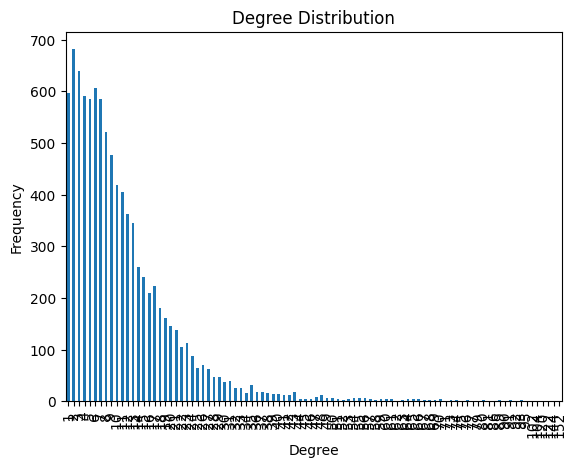

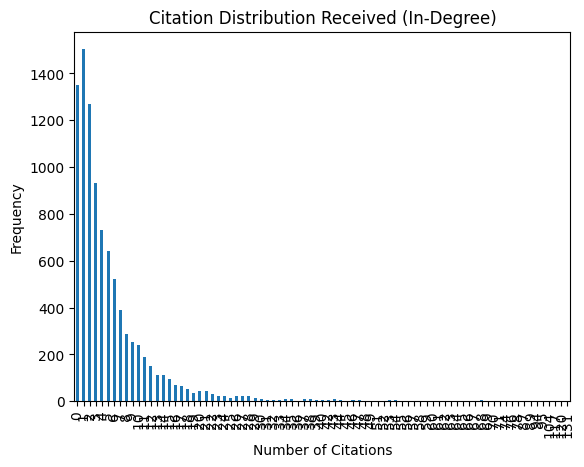

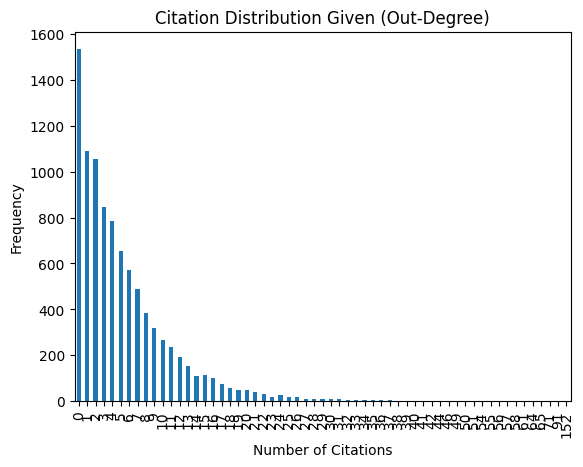

            Metric      Value
0  Number of Nodes      21984
1  Number of Edges     139134
2          Density   0.000576
3   Average Degree  12.657751
4       Graph Type     sparse


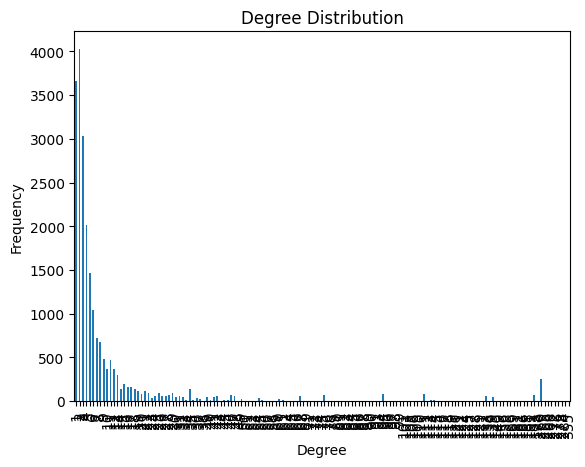

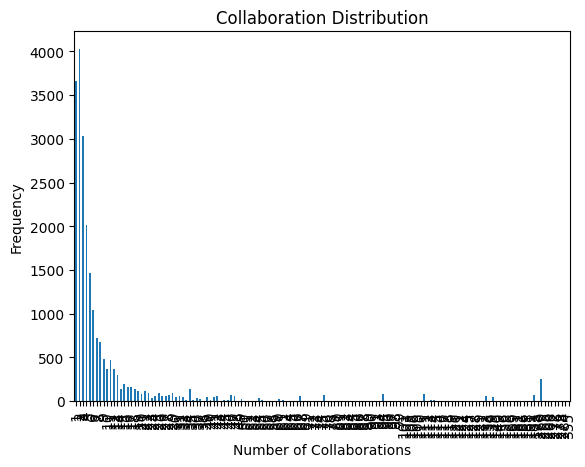

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
def visualize_citation_distribution(graph, title, degree_type='in'):
    # Calculate the degree (in-degree or out-degree) for each node
    if degree_type == 'in':
        degrees = graph.in_degree()
    else:
        degrees = graph.out_degree()

    # Create a Series for degree distribution
    degree_distribution = pd.Series([degree for _, degree in degrees])

    # Plotting
    degree_distribution.value_counts().sort_index().plot(kind='bar', title=title)
    plt.xlabel('Number of Citations')
    plt.ylabel('Frequency')
    plt.show()

def visualize_collaboration_distribution(graph):
    # Degree for each node
    degrees = graph.degree()

    # Create a Series for degree distribution
    degree_distribution = pd.Series([degree for _, degree in degrees])

    # Plotting
    degree_distribution.value_counts().sort_index().plot(kind='bar', title='Collaboration Distribution')
    plt.xlabel('Number of Collaborations')
    plt.ylabel('Frequency')
    plt.show()
def visualize_graph_features(graph, graph_type):
    # Basic Graph Information
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)
    avg_degree = sum(dict(graph.degree()).values()) / num_nodes
    network_type = 'dense' if density > 0.5 else 'sparse'

    # Degree Distribution
    degrees = [graph.degree(n) for n in graph.nodes()]
    degree_distribution = pd.Series(degrees).value_counts().sort_index()

    # Creating DataFrame for general graph information
    info_df = pd.DataFrame({
        'Metric': ['Number of Nodes', 'Number of Edges', 'Density', 'Average Degree', 'Graph Type'],
        'Value': [num_nodes, num_edges, density, avg_degree, network_type]
    })
    print(info_df)

    # Plotting degree distribution
    degree_distribution.plot(kind='bar', title='Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

    # Additional Plots Based on Graph Type
    if graph_type == 'citation':
        visualize_citation_distribution(graph, 'Citation Distribution Received (In-Degree)', degree_type='in')
        visualize_citation_distribution(graph, 'Citation Distribution Given (Out-Degree)', degree_type='out')

    elif graph_type == 'collaboration':
        visualize_collaboration_distribution(graph)

visualize_graph_features(citation_graph, 'citation')
visualize_graph_features(collaboration_graph, 'collaboration')

2

In [ ]:
import networkx as nx

def nodes_contribution(graph, node):
    if node not in graph:
        return "Node not found in the graph."

    results = {}
    results['Betweenness Centrality'] = nx.betweenness_centrality(graph).get(node, 0)
    results['PageRank'] = nx.pagerank(graph).get(node, 0)
    results['Closeness Centrality'] = nx.closeness_centrality(graph).get(node, 0)
    results['Degree Centrality'] = nx.degree_centrality(graph).get(node, 0)

    return results

result = nodes_contribution(citation_graph, 2144211451)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import networkx as nx

def nodes_contribution(graph, node):
    if node not in graph:
        return "Node not found in the graph.", {}

    # centrality values
    results = {
        'Betweenness Centrality': nx.betweenness_centrality(graph).get(node, 0),
        'PageRank': nx.pagerank(graph).get(node, 0),
        'Closeness Centrality': nx.closeness_centrality(graph).get(node, 0),
        'Degree Centrality': nx.degree_centrality(graph).get(node, 0)
    }

    return results

def visualize_nodes_contribution(contribution):
    if isinstance(contribution, tuple):
        print(contribution[0])
        return

    # Convert to DataFrame for visualization
    df = pd.DataFrame(contribution.items(), columns=['Centrality Measure', 'Value'])
    print(df)

specific_node = 2144211451
contribution = nodes_contribution(citation_graph, specific_node)
visualize_nodes_contribution(contribution)


KeyboardInterrupt: 

In [ ]:
result

{'Betweenness Centrality': 4.190431938301405e-05,
 'PageRank': 0.0025164871599480136,
 'Closeness Centrality': 0.06409463209729982,
 'Degree Centrality': 0.0020152736529486636}

3

In [ ]:
import networkx as nx

def shortest_ordered_walk(graph, nodes_sequence):
    if not all(node in graph for node in nodes_sequence):
        return "One or more nodes not found in the graph."

    path = []
    total_length = 0

    for i in range(len(nodes_sequence) - 1):
        start, end = nodes_sequence[i], nodes_sequence[i + 1]
        try:
            shortest_path = nx.shortest_path(graph, source=start, target=end)
            path.extend(shortest_path if i == 0 else shortest_path[1:])
            total_length += len(shortest_path) - 1
        except nx.NetworkXNoPath:
            return "No path between {} and {}.".format(start, end)

    return path, total_length

nodes_sequence = [2151103935, 1676552347, 2011891945, 2024668293, 2096077837]

path, length = shortest_ordered_walk(collaboration_graph  , nodes_sequence)
print("Shortest Ordered Path:", path)
print("Total Length of Path:", length)


ValueError: too many values to unpack (expected 2)

In [ ]:
import random

path = [2151103935, 1676552347, 2011891945, 2024668293, 2096077837]

def visualize_shortest_path(graph, path):
    pos = nx.spring_layout(graph)  # Node positions
    plt.figure(figsize=(10, 8))

    #  the entire graph lightly
    nx.draw(graph, pos, node_color='lightgrey', edge_color='lightgrey', with_labels=True)

    # Highlight the path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='red')
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Shortest Ordered Path Visualization")
    plt.show()

visualize_shortest_path(collaboration_graph, path)


KeyboardInterrupt: 

4

In [ ]:
import networkx as nx

def disconnecting_graphs(graph, node1, node2):
    if node1 not in graph or node2 not in graph:
        return "One or both nodes not found in the graph."

    working_graph = graph.copy()

    # Convert to undirected graph if needed
    if not isinstance(working_graph, nx.Graph):
        working_graph = working_graph.to_undirected()

    # Find the minimum cut
    cut_value, partition = nx.minimum_cut(working_graph, node1, node2)
    reachable, non_reachable = partition

    # Edges to be removed
    edges_to_remove = [(u, v) for u in reachable for v in non_reachable if graph.has_edge(u, v)]

    return edges_to_remove, cut_value


node1, node2 = 'nodeA', 'nodeB'
edges_to_remove, cut_value = disconnecting_graphs(citation_graph, node1, node2)
print("Edges to remove:", edges_to_remove)
print("Number of edges to cut:", cut_value)


In [ ]:
import random

all_authors = list(collaboration_graph.nodes())

# Random two different authors
authorA, authorB = random.sample(all_authors, 2)
# the Ford-Fulkerson algorithm to find cut edges
cut_edges = ford_fulkerson(collaboration_graph, authorA, authorB)

# Selecting authors
all_authors = list(collaboration_graph.nodes())
authorA, authorB = random.sample(all_authors, 2)

#  the minimum cut
cut_edges = ford_fulkerson(collaboration_graph, authorA, authorB)


In [ ]:
import matplotlib.pyplot as plt

def visualize_disconnected_graph(graph, cut_edges, node_a, node_b):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 10))

    #  the entire graph
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", edge_color="gray")

    # Highlight the nodes and cut edges
    nx.draw_networkx_nodes(graph, pos, nodelist=[node_a, node_b], node_color='red')
    nx.draw_networkx_edges(graph, pos, edgelist=cut_edges, edge_color='red', width=2)

    plt.title("Graph Before and After Disconnection")
    plt.show()


KeyboardInterrupt: 

5

In [ ]:
import networkx as nx
from networkx.algorithms import community

def extract_communities(graph):
    # Ensure the graph is undirected
    if isinstance(graph, nx.DiGraph):
        graph = graph.to_undirected()

    # Find communities
    communities = community.greedy_modularity_communities(graph)

    # Convert communities to a list of nodes
    communities_list = [list(community) for community in communities]

    return communities_list


communities = extract_communities(citation_graph )
print("Detected Communities:", communities)


Detected Communities: [[2150318080, 1638203394, 2076073997, 2169929748, 2110144538, 2154897437, 1579278367, 1974190112, 2340995113, 1534304300, 1994154030, 1568555062, 1993220166, 2028904519, 2066792529, 2049695835, 2159583324, 1998692453, 1549008998, 1964613733, 2135621733, 2105106534, 2176516200, 1982185581, 2148622452, 2294857847, 1947762817, 1592950931, 2169528473, 1977655452, 2101117089, 1771315362, 2147492008, 2098774185, 1548779692, 1970495662, 2155061423, 2129395888, 2144182447, 2145747124, 2914656440, 2094678200, 1589993665, 2117189826, 2098036931, 2101518532, 2158698691, 1524326598, 2153185479, 1666015432, 2132271306, 2110693578, 1660133578, 2100961486, 2099618002, 2151612633, 1989353689, 1982218468, 2103148772, 2107941094, 2055487721, 2125332715, 1585610988, 2107089133, 1578959085, 1968513265, 2170224888, 2100363512, 2173124859, 2028044548, 2156273926, 2095595785, 2035908878, 2125283600, 2168783124, 1965498649, 2156216606, 2171437346, 2087739686, 2150531367, 2011316522, 2045

In [ ]:
random.seed(42)  # Set a seed for reproducibility
subset_nodes = random.sample(list(citation_graph.nodes()), 50)  #  the number of nodes as needed
subgraph = citation_graph.subgraph(subset_nodes)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import community

# Function to extract communities from the graph
def extract_communities(graph):
    if isinstance(graph, nx.DiGraph):
        graph = graph.to_undirected()
    communities = community.greedy_modularity_communities(graph)
    return [list(community) for community in communities]


Detected Communities: [[2150318080, 1638203394, 2076073997, 2169929748, 2110144538, 2154897437, 1579278367, 1974190112, 2340995113, 1534304300, 1994154030, 1568555062, 1993220166, 2028904519, 2066792529, 2049695835, 2159583324, 1998692453, 1549008998, 1964613733, 2135621733, 2105106534, 2176516200, 1982185581, 2148622452, 2294857847, 1947762817, 1592950931, 2169528473, 1977655452, 2101117089, 1771315362, 2147492008, 2098774185, 1548779692, 1970495662, 2155061423, 2129395888, 2144182447, 2145747124, 2914656440, 2094678200, 1589993665, 2117189826, 2098036931, 2101518532, 2158698691, 1524326598, 2153185479, 1666015432, 2132271306, 2110693578, 1660133578, 2100961486, 2099618002, 2151612633, 1989353689, 1982218468, 2103148772, 2107941094, 2055487721, 2125332715, 1585610988, 2107089133, 1578959085, 1968513265, 2170224888, 2100363512, 2173124859, 2028044548, 2156273926, 2095595785, 2035908878, 2125283600, 2168783124, 1965498649, 2156216606, 2171437346, 2087739686, 2150531367, 2011316522, 2045

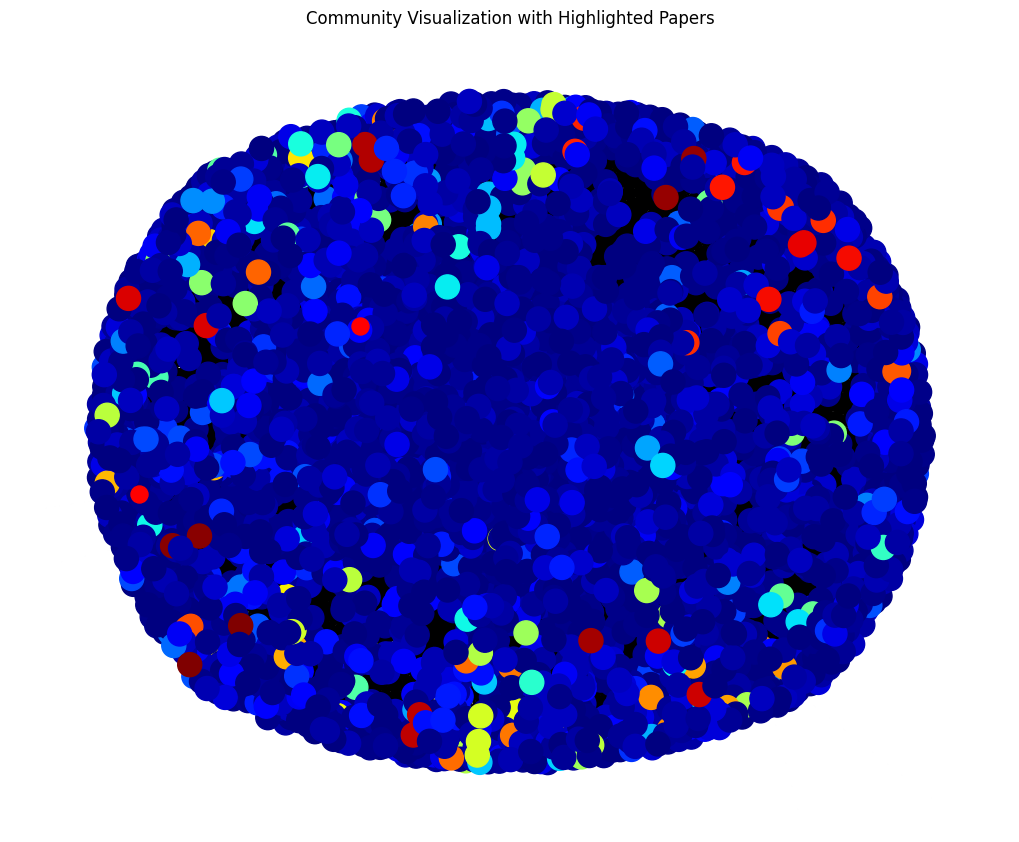

In [ ]:

# Function to visualize communities in the graph
def visualize_communities(graph, communities, paper_1, paper_2):
    # Create a color map for the communities
    color_map = {node: idx for idx, community in enumerate(communities) for node in community}
    node_colors = [color_map.get(node, 0) for node in graph.nodes()]
    pos = nx.spring_layout(graph)  # Node positions

    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.jet)
    nx.draw_networkx_nodes(graph, pos, nodelist=[paper_1, paper_2], node_color='red', node_size=150)
    plt.title("Community Visualization with Highlighted Papers")
    plt.show()

communities = extract_communities(citation_graph)
print("Detected Communities:", communities)

# Random two papers
paper_ids = list(citation_graph.nodes())
paper_1, paper_2 = random.sample(paper_ids, 2)

#  the communities with the selected papers highlighted
visualize_communities(citation_graph, communities, paper_1, paper_2)


## 5. Algorithmic Questions (AQ)

### Part A
#### 1. Implement an algorithm to solve the problem

In [ ]:
def inputs(txt):
    # reading input from the file txt
    with open(txt, 'r') as file:
        lines = file.readlines()
        # extracting N, M, and S from the first line
        N, M, S = map(int, lines[0].split())
        # optimal set of skills
        skills = lines[1].split()
        athletes = {}

        # parse athlete information
        for i in range(2, len(lines), S + 1):
            # getting the unique ID of the athlete
            athlete_id = int(lines[i].strip())
            athlete_skills = {}
            # extracting the skills and the scores for each athlete
            for j in range(i + 1, i + S + 1):
                skill, score = lines[j].split()
                athlete_skills[skill] = int(score)
            athletes[athlete_id] = athlete_skills

    return N, M, S, skills, athletes

def score(N, M, S, skills, athletes):
    max_scores = [0] * M
    selected_athletes = []

    # assigning athletes to roles based on optimal skills
    for skill_index, skill in enumerate(skills):
        max_score = 0
        selected_athlete = None

        for athlete_id, athlete_skills in athletes.items():
            if skill in athlete_skills and athlete_id not in selected_athletes:
                if athlete_skills[skill] > max_score:
                    max_score = athlete_skills[skill]
                    selected_athlete = athlete_id

        if selected_athlete:
            # we add the selected athlete to the team
            selected_athletes.append(selected_athlete)
            max_scores[skill_index] = max_score

    # returns the total maximum global score
    return sum(max_scores)

def main(txt):
    N, M, S, skills, athletes = inputs(txt)
    result = score(N, M, S, skills, athletes)
    print(f'The output is {result}')

# doing the test for the first input
if __name__ == "__main__":
    main("test1.txt")

# doing the test for the second input
if __name__ == "__main__":
    main("test2.txt")

The output is 370
The output is 399


#### 2. What is the time complexity (the Big O notation) of your solution? Please provide a detailed explanation of how you calculated the time complexity.

In the first part, function `inputs`, the algorithm reads the input so the N athletes each with S skills. The function loops over each candidate, which has N elements so it runs **N** times. Inside the loop, the function goes over each skill, which has S elements, so the nested loop runs **S** times. So the time complexity of the function is **O(N * S)**.

In the second part, function `score`, the algorithm selects the athletes to be part of the team and finds the maximum score. The first loop goes over the skill of the optimal set which has M elements, so the loop runs **M** times. Inside the loop the function loops over each candidate who is not already selected, which has at most N elements, so it runs **N** times. Inside this nested one the function goes over each skill score of the current candidate, which has S elements so runs **S** times. Then when we found the proficient athlete the function adds the athlete to the list of the team and updates the best score. (**O(1)**)
At last the function returns the some of the best scores which takes O(M) time because it iterates over M elements.
So the time complexity of this function is  O(M * (N * S + 1) + M) = **O(N * M * S)**.

So the total time complexity is given by the sum of the previous ones: **O(N * M * S)**

#### 3. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Compare your answer to theirs. If the two differ, which one is right? (why?)

So we asked ChatGPT what is the total time complexity of our algorithm:
```
Let's break down the time complexity of the provided code:

1.inputs() function:

Reading N athletes, each with S skills, involves iterating through these athletes and their skills.
Complexity: O(N * S)

2.score() function:

Assigning athletes to roles based on M skills:
For each of the M required skills:
Iterating through N athletes to find the one with the highest proficiency in that skill.
Total iterations for selecting athletes: O(M * N)
Complexity for role assignment: O(M * N)

3.Overall:

The dominant factor is the role assignment part (O(M * N)) within the score() function.
Therefore, the total time complexity of the provided code, excluding the main() function, is primarily governed by the role assignment part in the score() function and can be expressed as O(M * N). This represents the most significant operation in terms of time complexity for this code snippet.
```

I do not think that in general the time complexity is O(N * M). The reason is that the `score` function does not iterate over N candidates for each skill, but only over the candidates who are not already selected. Therefore, the number of iterations decreases as more candidates are selected. But in the worst case, the function may still need to check all N candidates for each skill, so the upper bound of the time complexity is O(N * M). However, this is not the exact time complexity, as it does not consider for the average or best case scenarios. For example, if the `score` function selects the best candidate for each skill in the first iteration, then the time complexity would be O(N), as it would not need to check any other candidates. So the time complexity of O(N * M * S) is a reasonable approximation, as it gives the upper bound of the worst case scenario.

#### 4. If your algorithm has exponential time complexity, can you provide a polynomial-time version?

The time complexity of this algorithm is O(N * M * S), where N is the number of candidates, M is the number of athletes to select, and S is the number of skills per candidate. This has a polynpmial time complexity.

#### 5. If S=1, how does the time complexity of an optimal algorithm to solve this problem change?

If S=1 the problem becomes easier because every athlete has one skill and score. So an optimal algorithm can do first the *sort* of the athletes by their skill name and score. It divides the input into smaller parts and recursively sort them, which takes O(log N) time for each part. Then, it merges or combines the sorted parts, which takes O(N) time for each level. So for the sorting it takes **O(N * logN)** time.\
After the algorithm choose the proeficient athlete for all the skill of the optimal set in **O(M)** time (scans the list and it's constant and do it for M times).\
At last there is the time to calculate the score that is the sum of the best scores which is **O(M)** (summing M times).

So the total time complexity in this case woul be the sum of these times: O(N * logN + M + M) = O(N * logN + 2M) = (if N is larger than M and because the log increase faster than the linear) =  **O(N * logN)**.

### PART B

#### 1. Prove or disprove that the problem is NP-complete.

To prove or disprove that the problem is NP-complete, it can be beneficial to attempt a reduction to a known NP-hard problem, such as the set covering problem, which is well-established as NP-hard.\
Let's try doing an example: suppose to have this set of skills T = [1,2,3] that we want to cover and 4 individuals X = [A, B, C, D] with the following skills and following efforts with others (we also suppose that every node are connected):

- A has skills (1,2) and associated efforts [(B, 1), (C, 3), (D, 2)]
- B has skills (2) and associated efforts [(A, 1), (C, 2), (D, 3)]
- C has skills (3) and associated efforts [(A, 3), (B, 2), (D, 1)]
- D has skills (1, 3) and associated efforts [(A, 2), (B, 3), (C, 1)]

Now we can map the individuals' skills to subsets of a universe, with the goal of finding a minimum subset of individuals (subsets) whose union covers all the skills mentioned. The mapping involves associating:

1. Skills of individuals to subsets of the universe.
2. Efforts between individuals to relationships or costs between these subsets in the set covering problem.

This mapping allows us to frame the problem in the context of the set covering problem, where finding a solution involves identifying the minimum subsets that covers all required skills while considering the associated efforts as the cost of combining these subsets.

Let's say that the solution is X'= [A,C], the skills are covered because together they have all the skills and the weight of the edge between them is 3 which it can be calculate in a polnomial time. So selecting a subset of individuals in the problem that covers all required skills T while minimizing effort corresponds to finding a solution to the set covering problem. This transformation can be done in polynomial time. If there exists a solution to the set covering instance, it translates to a solution to the problem. Specifically, if a subset of subsets in the set covering problem covers the universe, then the corresponding subset of individuals in the problem should cover all required skills T and have the minimum cost of working together. This equivalence can be checked in polynomial time. Proving successfully all of these, we can say that the problem is NP-hard and because we know that is also NP (because we can verify the solution in polynomial time), the problem is NP-complete.

#### 2. Write a heuristic in order to approximate the best solution for this problem.

We can follow these steps:

1. **Initialize an empty team**: Start with no individuals in the team. So X' = [] where X' is a subset of X.

2. **While not all skills in T are covered by the team X'**: Continue the process until all the required skills are covered by the team.

3. **Find the best individual**: Among the remaining individuals, find the one who can add the most uncovered skills to the team.

4. **Add the best individual to the team**: Add this individual x to the team.

5. **Remove the best individual from the pool**: Remove this individual from the pool of all individuals, so they won't be considered in the next iterations.

6. **Construct the graph G**: Once a team that covers all skills is formed, construct a graph where the nodes represent the individuals in the team and the edges represent the effort required for pairs of individuals to work well together.

7. **Find the minimum spanning tree**: Find the minimum spanning tree of the graph. This represents the configuration of the team where the total effort of working together is minimized.

8. **Form the final team**: The individuals corresponding to the nodes in the minimum spanning tree form the final team.

9. **Return the final team**: The final team is then returned as the result.


#### 3.What is the time complexity of your solution ?

The time complexity of the heuristic solution depends on:

- **Finding the best individual**: This step is performed in each iteration until all skills are covered. If we assume that checking the skills of an individual and updating the team can be done in constant time, this step would take O(n) time in each iteration, where n is the number of individuals. Since we’re performing this step until all skills are covered, in the worst case, this could take O(n^2) time.

- **Constructing the graph**: This step involves creating a graph with an edge between every pair of individuals in the team. If the team has m individuals, there would be O(m^2) edges, and hence constructing the graph would take O(m^2) time.

- **Finding the minimum spanning tree**: This can be done using Prim’s or Kruskal’s algorithm in O(m^2) or O(m * logm) time respectively, where m is the number of nodes in the graph.

So, the overall time complexity of the heuristic would be O(n^2) for finding the best individual in each iteration, plus O(m^2) or O(m * logm) for constructing the graph and finding the MST. Here, n is the total number of individuals and m is the number of individuals in the final team.